# Ev. 10:- Zomato Restaurant Project

In [1]:
# For importing neccessary libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file:-
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding="latin-1")

In [3]:
# .head used for fetching first five rows 
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [28]:
# For importing 2nd dataset also for predictions:-
datanew=pd.read_excel("Country-Code.xlsx")
datanew

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


# EXPLORATORY DATA ANALYSIS ( EDA):-

In [4]:
# For checking how many rows and columns are there in dataset:-
data.shape

(9551, 21)

In [5]:
# For checking the available columns in the dataset:-
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
# For checking the Null values in the dataset.
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Here, as seen above there are no null values present in the dataset.

In [7]:
# For checking the information of the dataset:-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
# For checking the datatypes of each columns:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In this, the Target column is Price Range And Average Cost of two both having int64 as datatype,
and there is one column named Locality Verbose which is not required further for model building purposes as it is having similar data.

In [9]:
# For checking the unique values in the dataset:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

Here, in Restaurant ID it is having maximum unique values which will affect our model performace. so it should be dropped.

In [10]:
# For dropping the not required column:-
data.drop("Restaurant ID",axis=1, inplace=True)

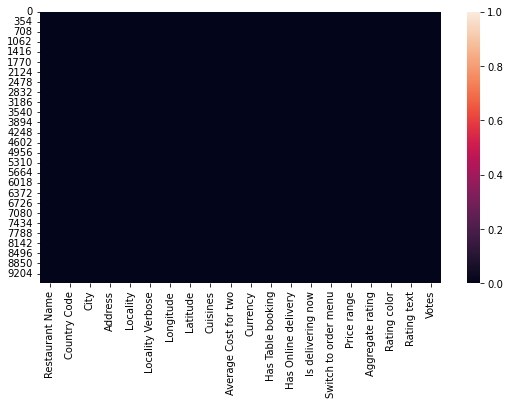

In [11]:
# For visualising and confirming presence of null values using heatmap:-
plt.figure(figsize=(9,5))
sns.heatmap(data.isnull())
plt.show()

As seen above, there are no null values present in dataset.

In [12]:
# For checking that there are any empty spaces or observations present in the dataset:-
data.loc[data['Price range']== " "]

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


In [13]:
# For checking that there are any empty spaces or observations present in the dataset:-
data.loc[data['Average Cost for two']== " "]

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes


In [14]:
# For checking the value counts of each column present in the dataset:-
for i in data.columns:
    print(data[i].value_counts())
    print("-------")

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64
-------
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64
-------
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64
-------
Dilli Haat, INA, New Delhi                                 

Here, there is a column named Locality Verbose which seems very similar with Locality, so we can drop this column

In [15]:
# For dropping the column with more than 70% 0 values:-
data=data.drop(["Locality Verbose"],axis=1)

In [16]:
# For checking the statistical summary of all the columns in the dataset:-
data.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Here, there is a difference in Mean and Median(50% percentile) in columns like 
Country Code, Longitude, Latitude,Aggregare Rating, Votes which denotes skewness is present in the dataset.

Here, also there is presence of outliers also in most of columns because of the Gap between 75 % ans Max values.

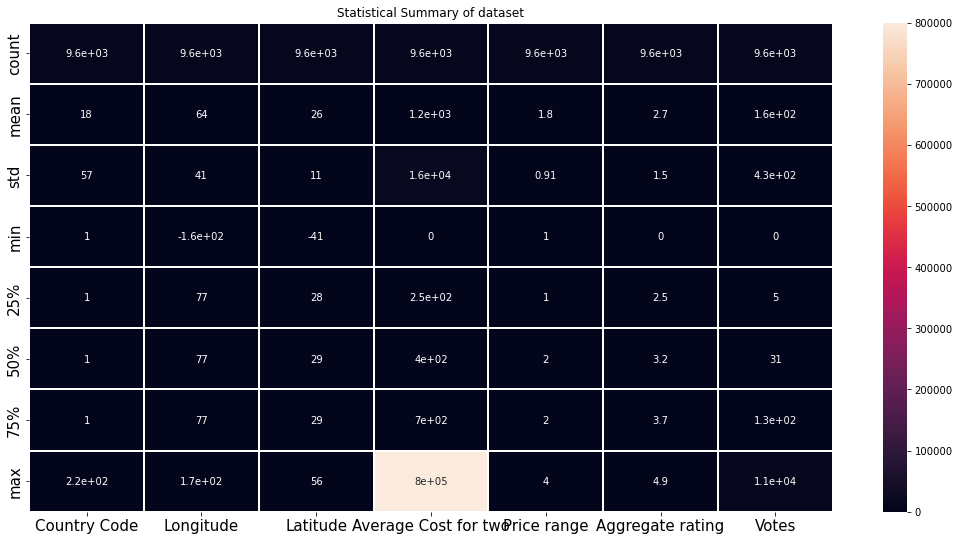

In [17]:
# For visualising the Statistical Description using heatmap:-

plt.figure(figsize=(18,9))
sns.heatmap(data.describe(),linewidth=.2, annot=True,fmt=".2g")
plt.title("Statistical Summary of dataset")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Performing Univariate Analysis:-

In [18]:
# For distributing our data into two variables i.e.category and integer:-
Category=[]
for i in data.dtypes.index:
    if data.dtypes[i]=="object":
        Category.append(i)
print(Category)

['Restaurant Name', 'City', 'Address', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [19]:
# For distributing our data into two variables i.e.category and integer:-
Integer=[]
for i in data.dtypes.index:
    if data.dtypes[i]!="object":
        Integer.append(i)
print(Integer)

['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


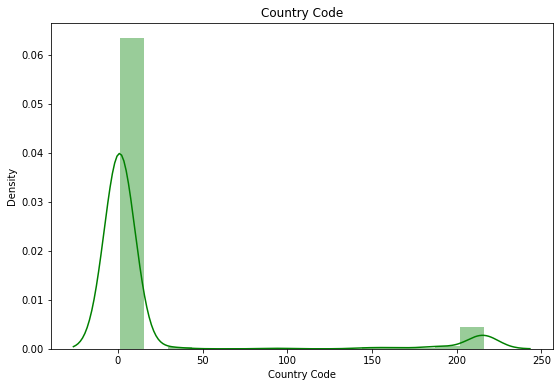

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


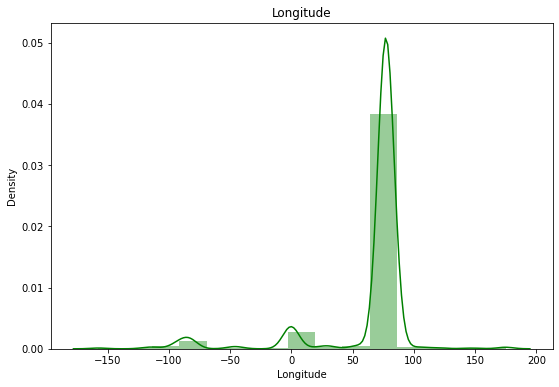

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


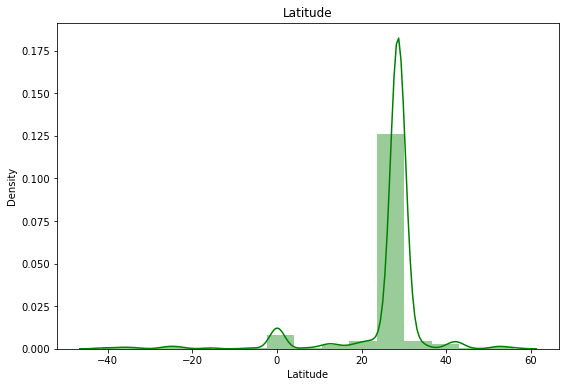

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


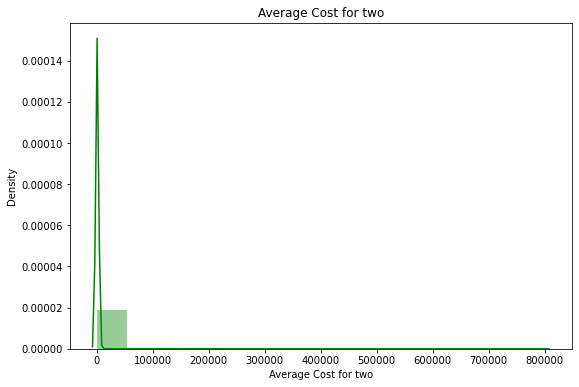

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


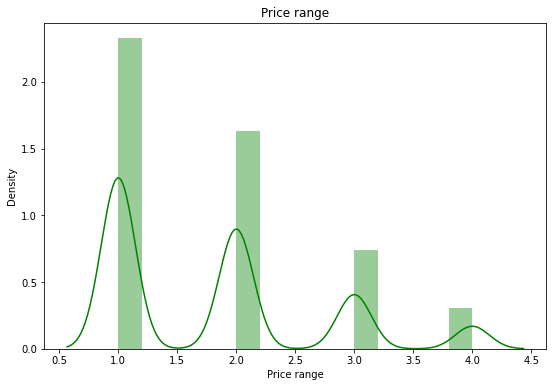

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


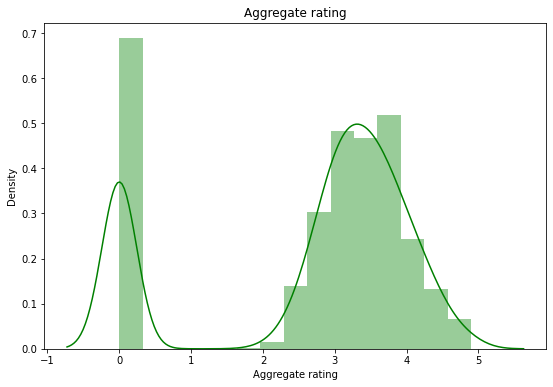

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


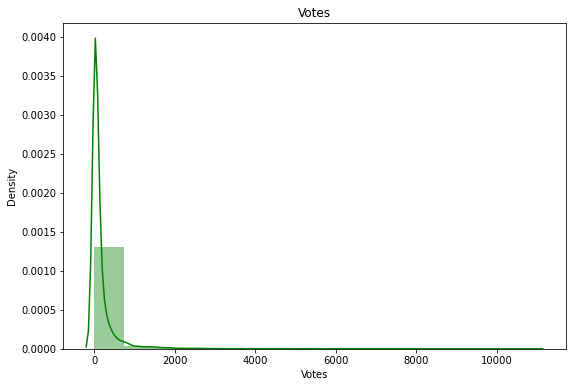

In [20]:
# For visualising Integer data using distplot method:-
for i in data[Integer]:
    plt.figure(figsize=(9,6))
    sns.distplot(data[i], color="g", bins=15)
    plt.title(i)
    plt.show()

Here, the skewness has been clearly seen in above plots.

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing fr

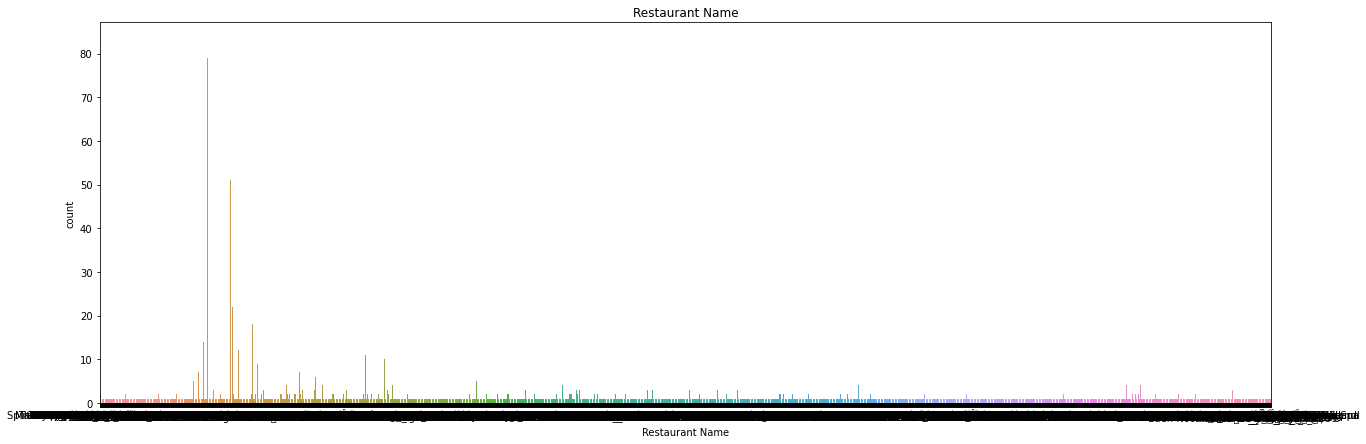

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


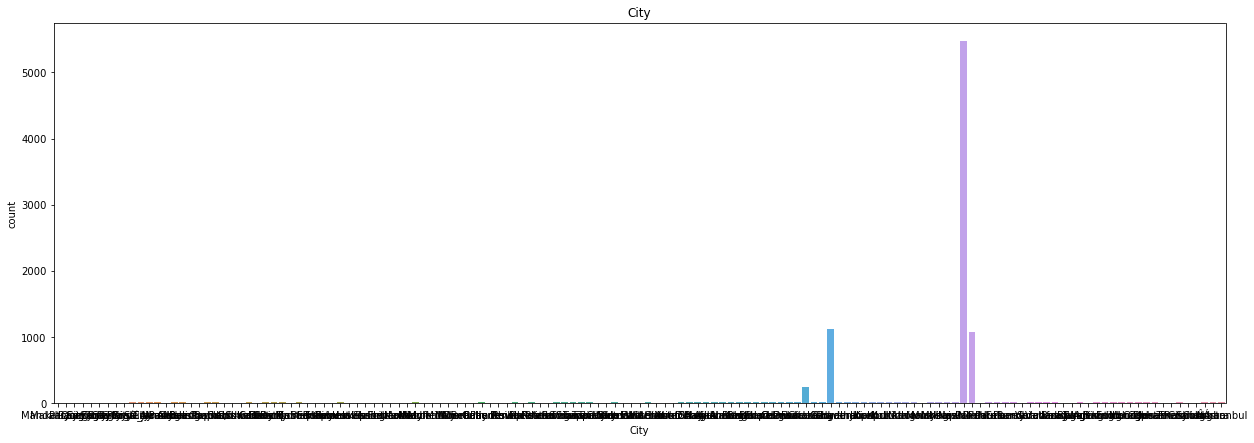

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.nda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.pri

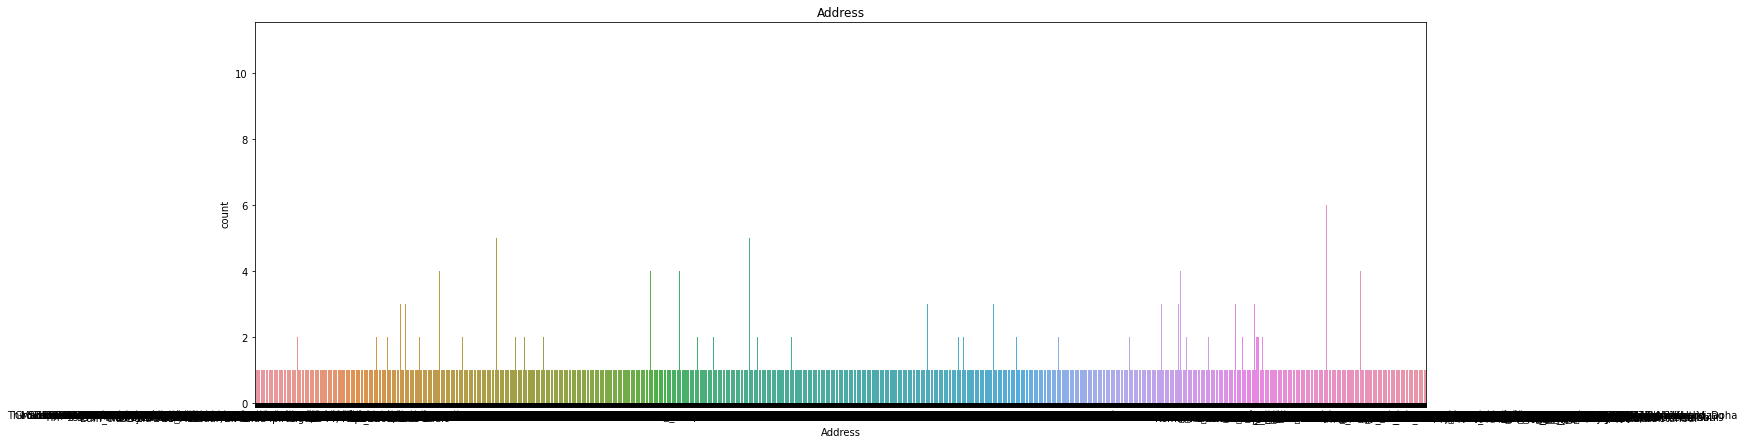

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


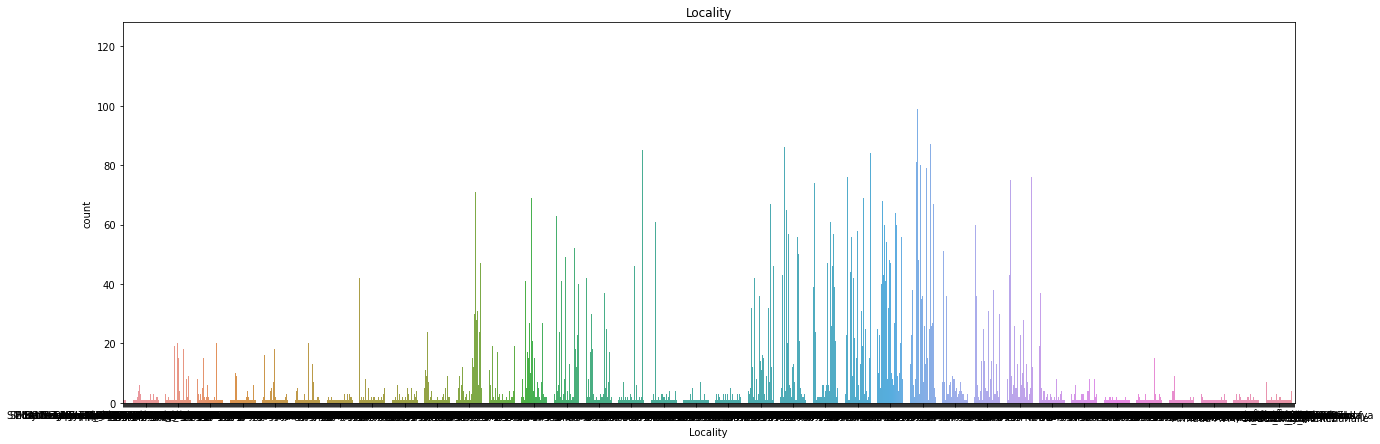

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


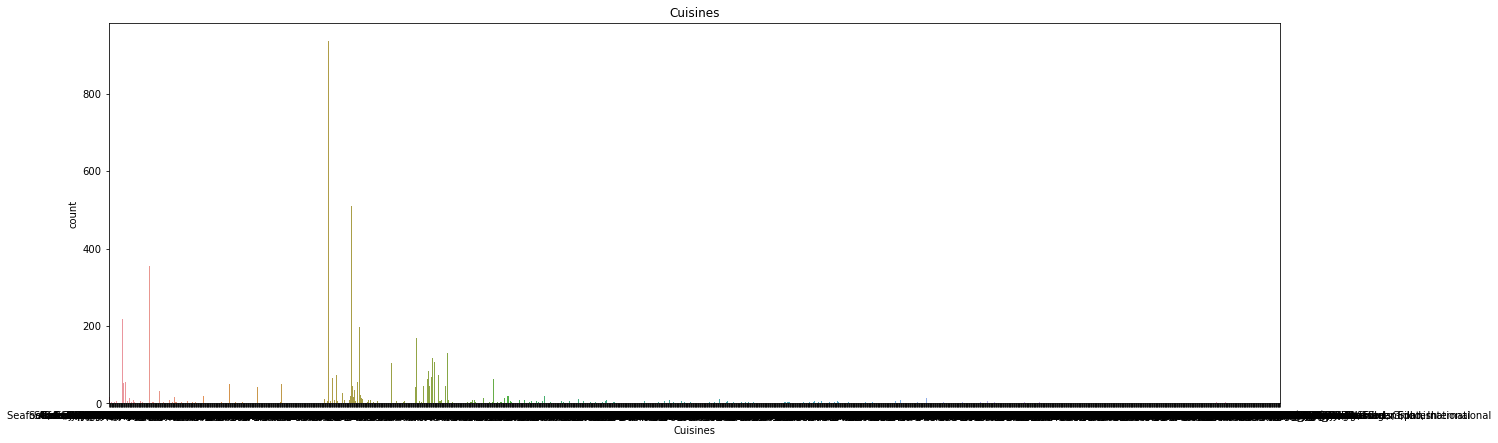

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


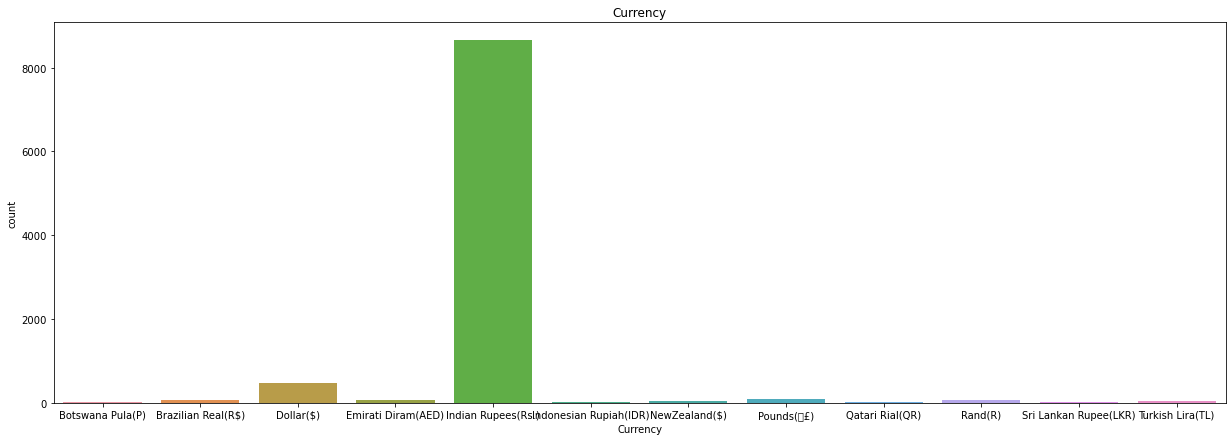

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


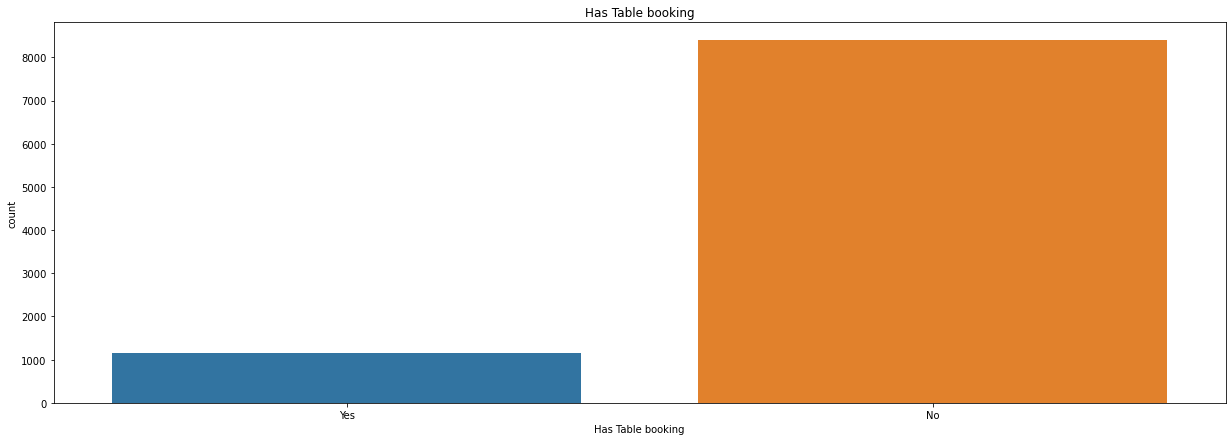

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


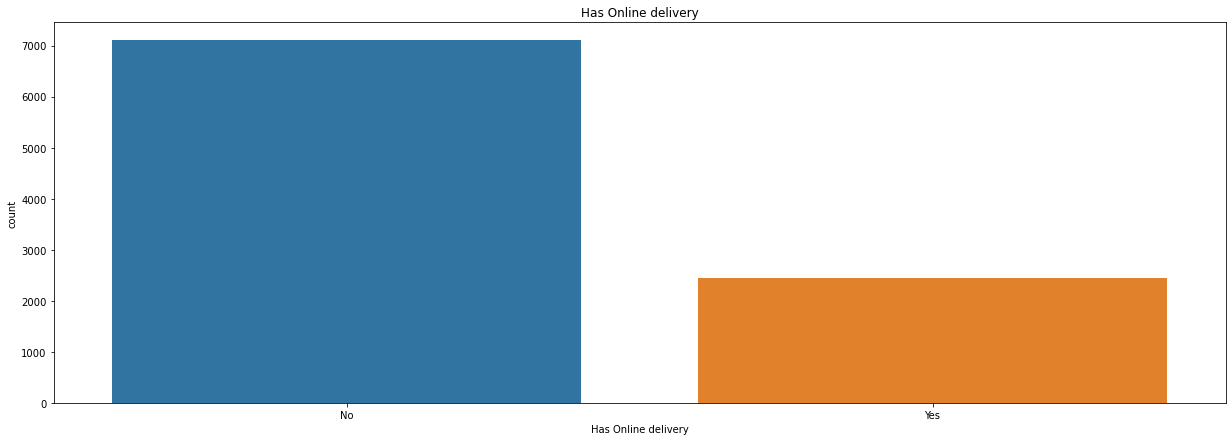

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


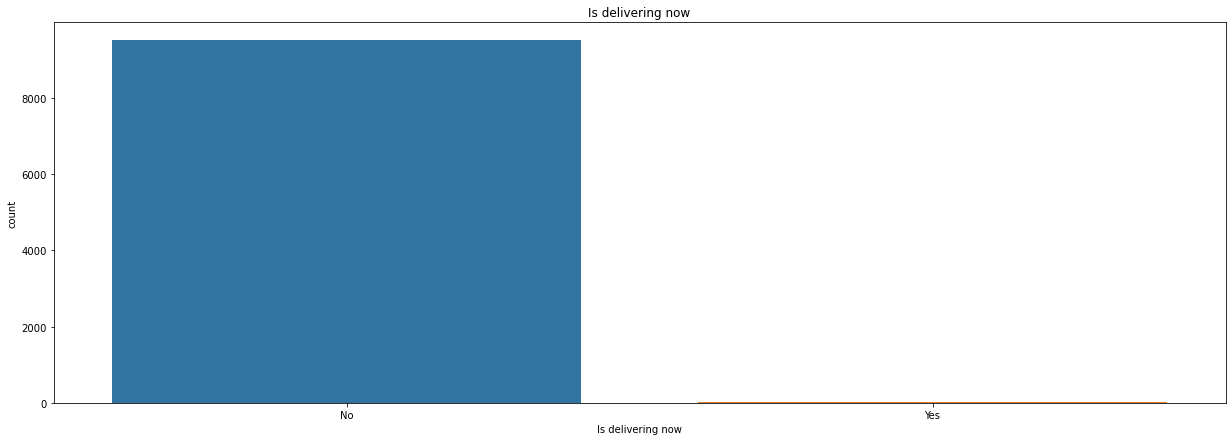

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


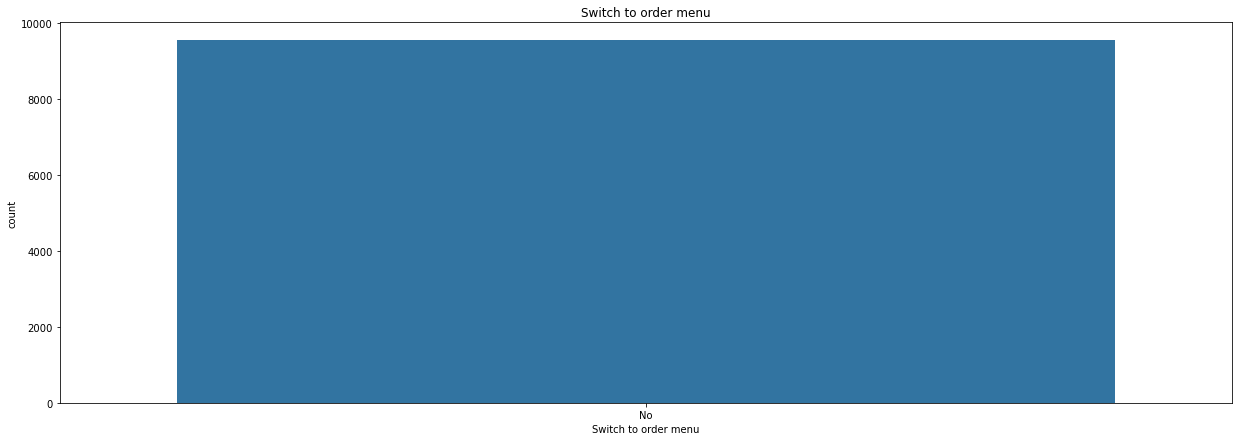

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


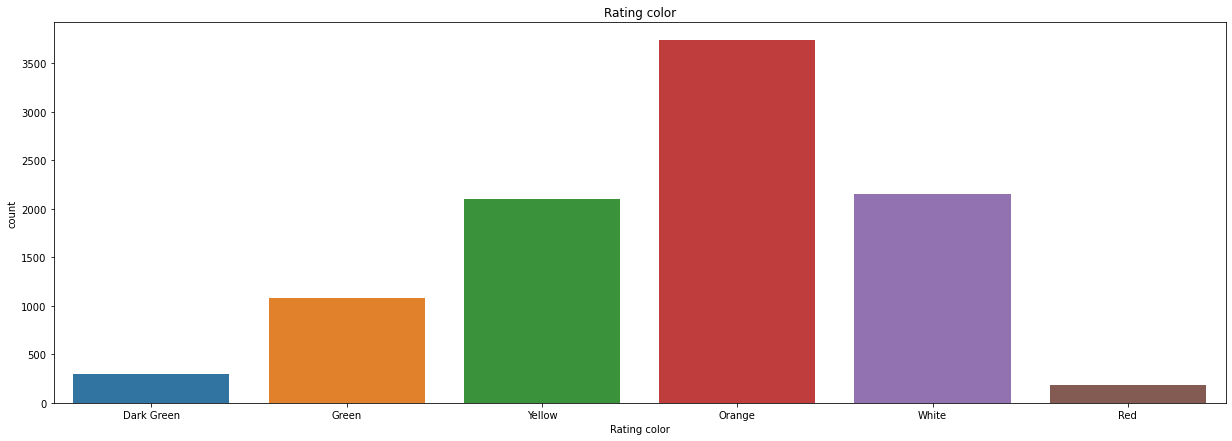

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


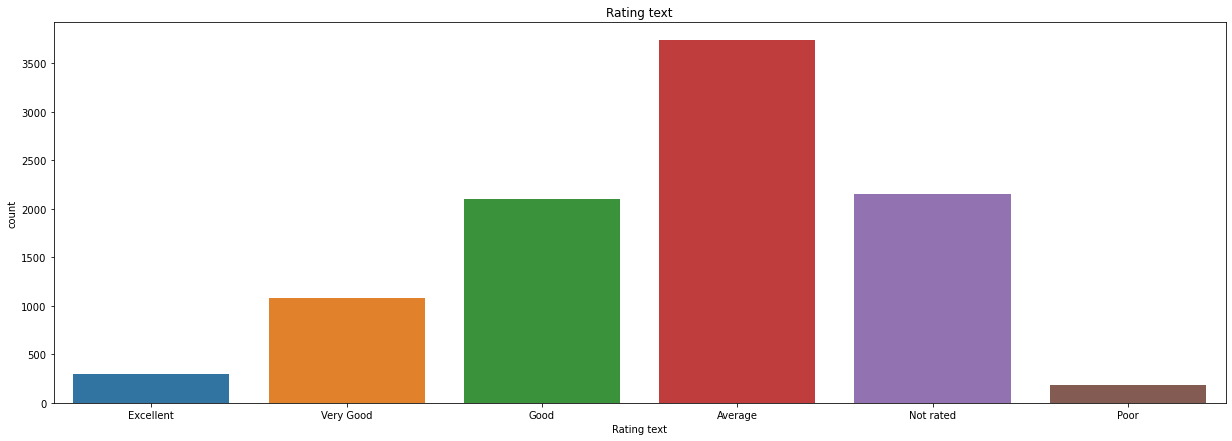

In [21]:
# For visualizing and checking columns in category using countplot:-

for i in data[Category]:
    plt.figure(figsize=(21,7))
    sns.countplot(data[i])
    plt.title(i)
    plt.show()

Here. in Rating color,Orange has received maximum values and in Rating Text, mostly ratings are having Average values.

Here. people ordering from online source are having lesser number.

# Bivariate Analysis:-

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWar

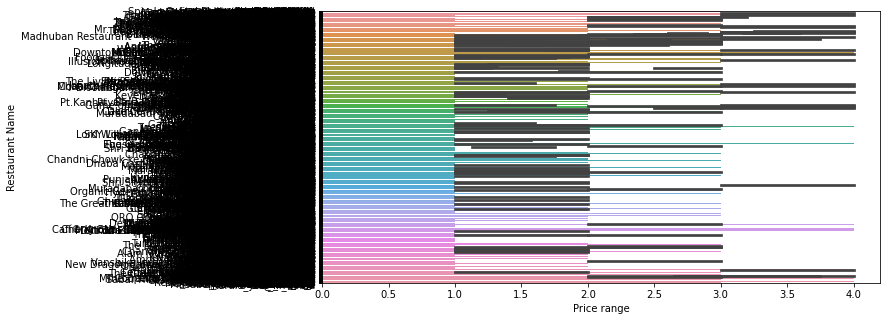

In [23]:
# For checking correlation between Res Name and Price range column:

plt.figure(figsize=(10,5))
sns.barplot(x='Price range',y="Restaurant Name",data=data)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.8'),
  Text(2, 0, '1.9'),
  Text(3, 0, '2.0'),
  Text(4, 0, '2.1'),
  Text(5, 0, '2.2'),
  Text(6, 0, '2.3'),
  Text(7, 0, '2.4'),
  Text(8, 0, '2.5'),
  Text(9, 0, '2.6'),
  Text(10, 0, '2.7'),
  Text(11, 0, '2.8'),
  Text(12, 0, '2.9'),
  Text(13, 0, '3.0'),
  Text(14, 0, '3.1'),
  Text(15, 0, '3.2'),
  Text(16, 0, '3.3'),
  Text(17, 0, '3.4'),
  Text(18, 0, '3.5'),
  Text(19, 0, '3.6'),
  Text(20, 0, '3.7'),
  Text(21, 0, '3.8'),
  Text(22, 0, '3.9'),
  Text(23, 0, '4.0'),
  Text(24, 0, '4.1'),
  Text(25, 0, '4.2'),
  Text(26, 0, '4.3'),
  Text(27, 0, '4.4'),
  Text(28, 0, '4.5'),
  Text(29, 0, '4.6'),
  Text(30, 0, '4.7'),
  Text(31, 0, '4.8'),
  Text(32, 0, '4.9')])

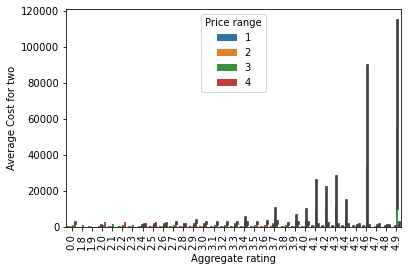

In [31]:
# For plotting Agg Rating  and Average Cost with hue as Price Range  column:
sns.barplot(x="Aggregate rating",y="Average Cost for two", hue="Price range", data=data)
plt.xticks(rotation=90)

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Locality', ylabel='Price range'>

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 136 (\x88) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


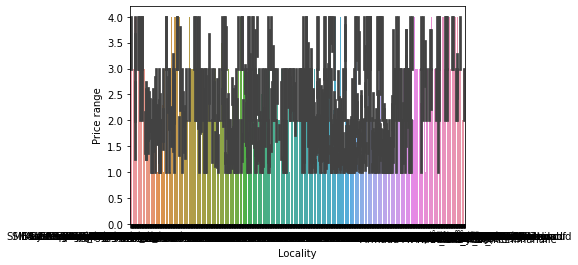

In [32]:
# For plotting Locality with Price Range:-
sns.barplot(data['Locality'],data['Price range'])

<AxesSubplot:xlabel='Price range', ylabel='Votes'>

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWar

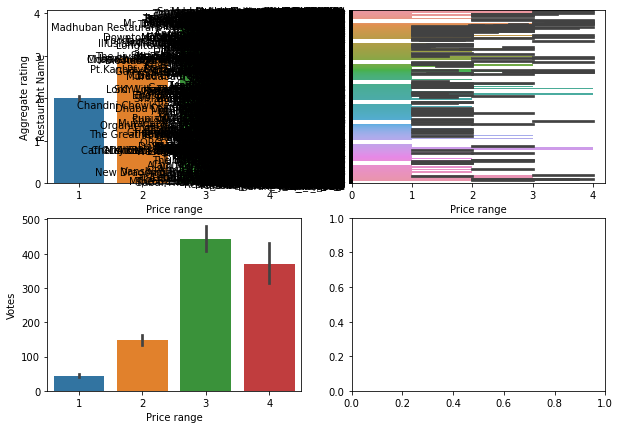

In [36]:
fig,axes=plt.subplots(2,2,figsize=(10,7))

# For Checking Price range with Aggregate rating:
sns.barplot(x='Price range',y='Aggregate rating',ax=axes[0,0],data=data)

# For Checking Price range with Restaurant Name :
sns.barplot(x='Price range',y='Restaurant Name',ax=axes[0,1],data=data)

# For Checking Price range with :
sns.barplot(x='Price range',y='Votes',ax=axes[1,0],data=data)

Here, the price range between 400-500 has maximum amount of outcomes.

# Multivariate Analysis:-

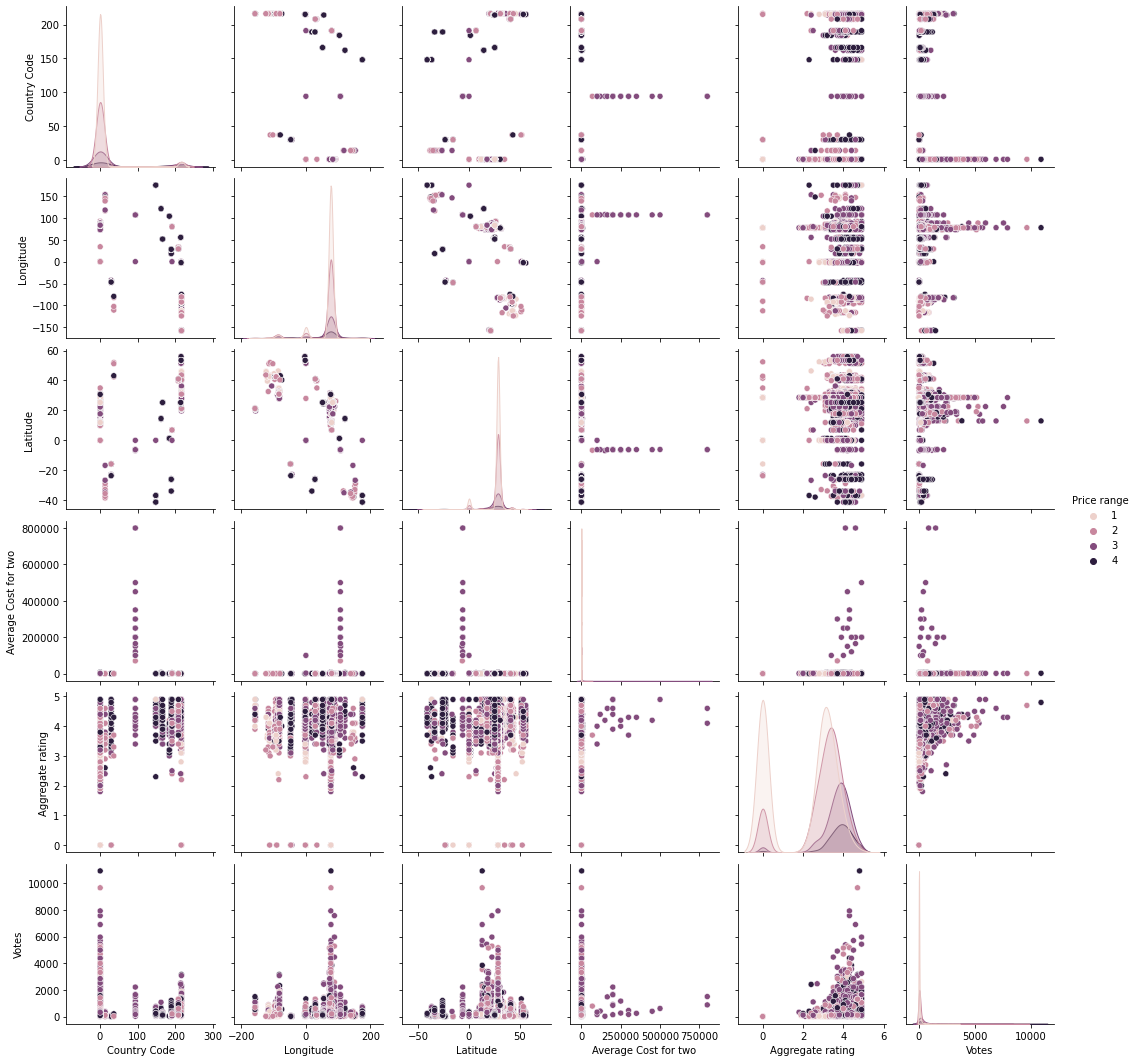

In [37]:
# For checking the correlation among all columns:
sns.pairplot(data,hue="Price range")

In [38]:
# For checking correlation using data.corr():-
corr=data.corr()

In [39]:
corr

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Country Code,1.000000,-0.698299,0.019792,0.043225,0.243327,0.282189,0.154530
Longitude,-0.698299,1.000000,0.043207,0.045891,-0.078939,-0.116818,-0.085101
Latitude,0.019792,0.043207,1.000000,-0.111088,-0.166688,0.000516,-0.022962
Average Cost for two,0.043225,0.045891,-0.111088,1.000000,0.075083,0.051792,0.067783
Price range,0.243327,-0.078939,-0.166688,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.282189,-0.116818,0.000516,0.051792,0.437944,1.000000,0.313691
Votes,0.154530,-0.085101,-0.022962,0.067783,0.309444,0.313691,1.000000


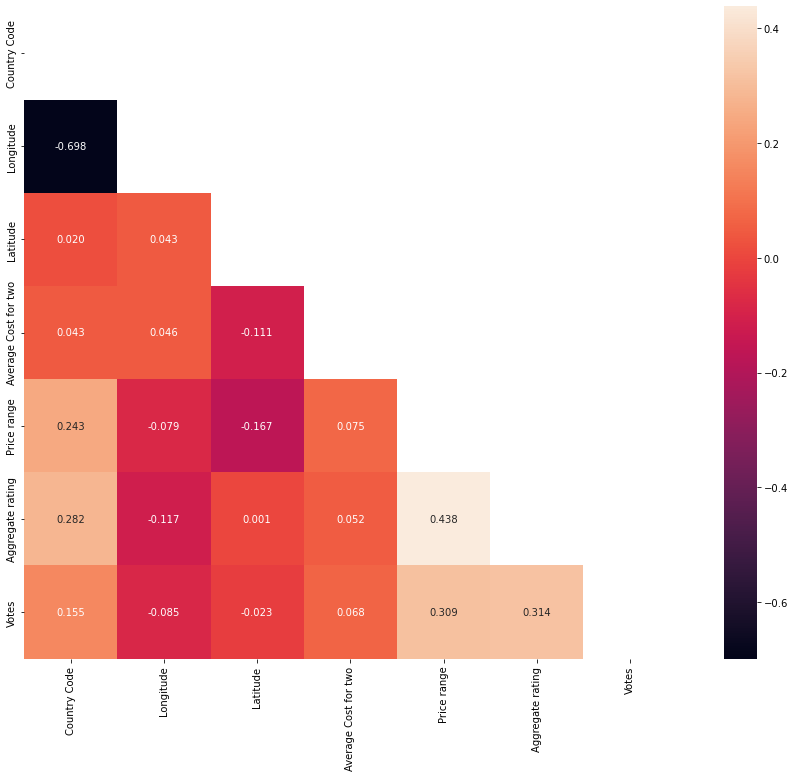

In [40]:
# For visualising correlation using heatmap method for clarity:-
tri=np.triu(data.corr())
plt.figure(figsize=(17,12))
sns.heatmap(data.corr(), annot=True, square= True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

Here, the column Longitude is very highly correlated with columns.

<AxesSubplot:>

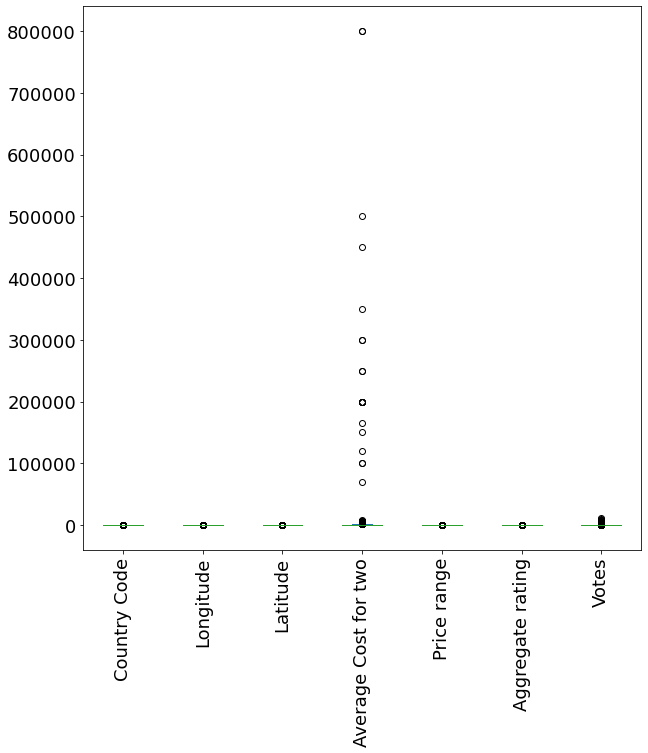

In [41]:
# For detection of outliers using boxplot method:
data.plot(kind="box",fontsize=18,figsize=(10,10),rot=90)

Here, most of the outliers are present in column Average Cost for two and votes, so it will affect our model performance further
and all rest column above having very less amount of outliers so these we will not remove.

# Removal of Outliers:-

In [43]:
# for defining outlier columns to a particular variable:-
outliers=data[["Votes","Average Cost for two"]]

In [44]:
# For importing required libraries for removal of outliers:-
from scipy.stats import zscore
z=np.abs(zscore(outliers))
data1=data[(z<3).all(axis=1)]
data1.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [45]:
# For checking whether the outliers ahs been removed or not:-
data1.shape

(9362, 19)

Here, so now we have 9362 rows left and 19 columns.

In [46]:
# For checking the dataloss percentage:-
loss=(((data.shape[0]-data1.shape[0])/data.shape[0])*100)
loss

1.978850382158936

As seen above, the data loss is very less and is under acceptable limit.

# Checking Skewness levels:-

In [47]:
# For checking the skewness in new dataset:-
data1.skew()

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_9832\2028546595.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1.skew()


Country Code            3.073330
Longitude              -2.804979
Latitude               -3.124155
Average Cost for two    3.619524
Price range             0.933571
Aggregate rating       -0.940907
Votes                   3.216882
dtype: float64

Here, mostly all columns are having skewness in it, so it should be removed.

In [50]:
# For removing skewness using yeo-johnson method:-
A=["Country Code","Longitude","Latitude","Average Cost for two","Price range","Aggregate rating","Votes"]

In [51]:
# For removing skewness using yeo-johnson method:-

# For importing required libraries:-
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method="yeo-johnson")
'''
parameters:
method="box_cox or "yeo-johnson
'''

'\nparameters:\nmethod="box_cox or "yeo-johnson\n'

In [54]:
# For removing the skewness levels:-
data1[A]=scaler.fit_transform(data1[A].values)

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_9832\2945943175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[A]=scaler.fit_transform(data1[A].values)


In [55]:
# For checking the skewness again:-
data1[A].skew()

Country Code            2.826616
Longitude               1.518575
Latitude                0.680523
Average Cost for two    0.014708
Price range             0.117613
Aggregate rating        0.027828
Votes                   0.014333
dtype: float64

Here, the skewness has normalised to some extent as compared to earlier.

# Encoding Techniques:-

In [57]:
# For dividing the data into categorical/ numerical:
Category1=[]
Integer1=[]
for i in data1.dtypes.index:
    if data1.dtypes[i]=="object":
        Category1.append(i)
    else:
        Integer1.append(i)
print(Category1)


print(Integer1)

['Restaurant Name', 'City', 'Address', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']
['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [58]:
# For importing required libraries:-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1[Category1]=data1[Category1].apply(le.fit_transform)

C:\Users\RISHABH JOHRI\AppData\Local\Temp\ipykernel_9832\1720203064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[Category1]=data1[Category1].apply(le.fit_transform)


In [59]:
# For checking the converted data:-
data1[Category1].head()

,Restaurant Name,City,Address,Locality,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
0,3699,70,8508,160,881,0,1,0,0,0,0,1
1,3127,70,5912,565,1063,0,1,0,0,0,0,1
2,2853,72,4581,293,1611,0,1,0,0,0,1,5
3,4634,72,8513,823,1078,0,0,0,0,0,0,1
4,5439,72,8512,823,1074,0,1,0,0,0,0,1


Here, as seen above the Categorical columns has been converted to Numerical for proceeding ahead.

In [60]:
# For checking the correlation in the new dataset:-
corr=data1.corr()
corr

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant Name,1.000000,0.016692,-0.001035,0.002549,0.007366,-0.001195,0.015617,0.054835,0.039941,0.007633,0.037858,0.028079,0.012186,NaN,0.062541,0.028550,-0.007511,0.011005,0.039207
Country Code,0.016692,1.000000,-0.173219,-0.202946,-0.126827,-0.338911,0.198646,-0.138148,-0.509106,-0.190581,-0.064047,-0.163534,-0.019201,NaN,0.244350,0.409724,-0.193728,0.233655,0.309292
City,-0.001035,-0.173219,1.000000,-0.019745,0.093550,0.105866,-0.070822,0.026502,0.040402,-0.049116,0.004834,0.015029,-0.014626,NaN,-0.113965,-0.168026,0.104108,-0.095570,-0.127168
Address,0.002549,-0.202946,-0.019745,1.000000,0.159927,0.075403,-0.103383,0.020748,0.144237,0.089520,0.010867,0.031967,0.031248,NaN,-0.054719,-0.153127,0.069647,-0.002550,-0.186893
Locality,0.007366,-0.126827,0.093550,0.159927,1.000000,0.068679,-0.047444,0.006639,0.010094,0.037710,-0.056629,-0.027485,-0.007978,NaN,-0.108767,-0.187846,0.034725,-0.028317,-0.196395
Longitude,-0.001195,-0.338911,0.105866,0.075403,0.068679,1.000000,-0.064705,0.059556,0.258517,0.139534,0.071273,0.129973,0.014312,NaN,-0.021718,-0.062693,-0.004934,-0.125974,-0.023627
Latitude,0.015617,0.198646,-0.070822,-0.103383,-0.047444,-0.064705,1.000000,-0.007976,-0.224358,-0.008291,0.027995,0.057827,0.009122,NaN,-0.036945,0.070469,-0.028508,-0.056520,0.103050
Cuisines,0.054835,-0.138148,0.026502,0.020748,0.006639,0.059556,-0.007976,1.000000,0.080201,0.079960,0.052416,-0.016085,0.007758,NaN,0.000055,-0.112046,-0.015898,-0.084057,-0.068847
Average Cost for two,0.039941,-0.509106,0.040402,0.144237,0.010094,0.258517,-0.224358,0.080201,1.000000,0.221031,0.522319,0.225914,0.030969,NaN,0.552685,0.115197,0.026363,-0.073037,0.225943
Currency,0.007633,-0.190581,-0.049116,0.089520,0.037710,0.139534,-0.008291,0.079960,0.221031,1.000000,0.006740,0.027284,0.003659,NaN,0.027238,-0.047785,-0.019621,-0.013184,-0.042817


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0, 0.5, 'Restaurant Name'),
  Text(0, 1.5, 'Country Code'),
  Text(0, 2.5, 'City'),
  Text(0, 3.5, 'Address'),
  Text(0, 4.5, 'Locality'),
  Text(0, 5.5, 'Longitude'),
  Text(0, 6.5, 'Latitude'),
  Text(0, 7.5, 'Cuisines'),
  Text(0, 8.5, 'Average Cost for two'),
  Text(0, 9.5, 'Currency'),
  Text(0, 10.5, 'Has Table booking'),
  Text(0, 11.5, 'Has Online delivery'),
  Text(0, 12.5, 'Is delivering now'),
  Text(0, 13.5, 'Switch to order menu'),
  Text(0, 14.5, 'Price range'),
  Text(0, 15.5, 'Aggregate rating'),
  Text(0, 16.5, 'Rating color'),
  Text(0, 17.5, 'Rating text'),
  Text(0, 18.5, 'Votes')])

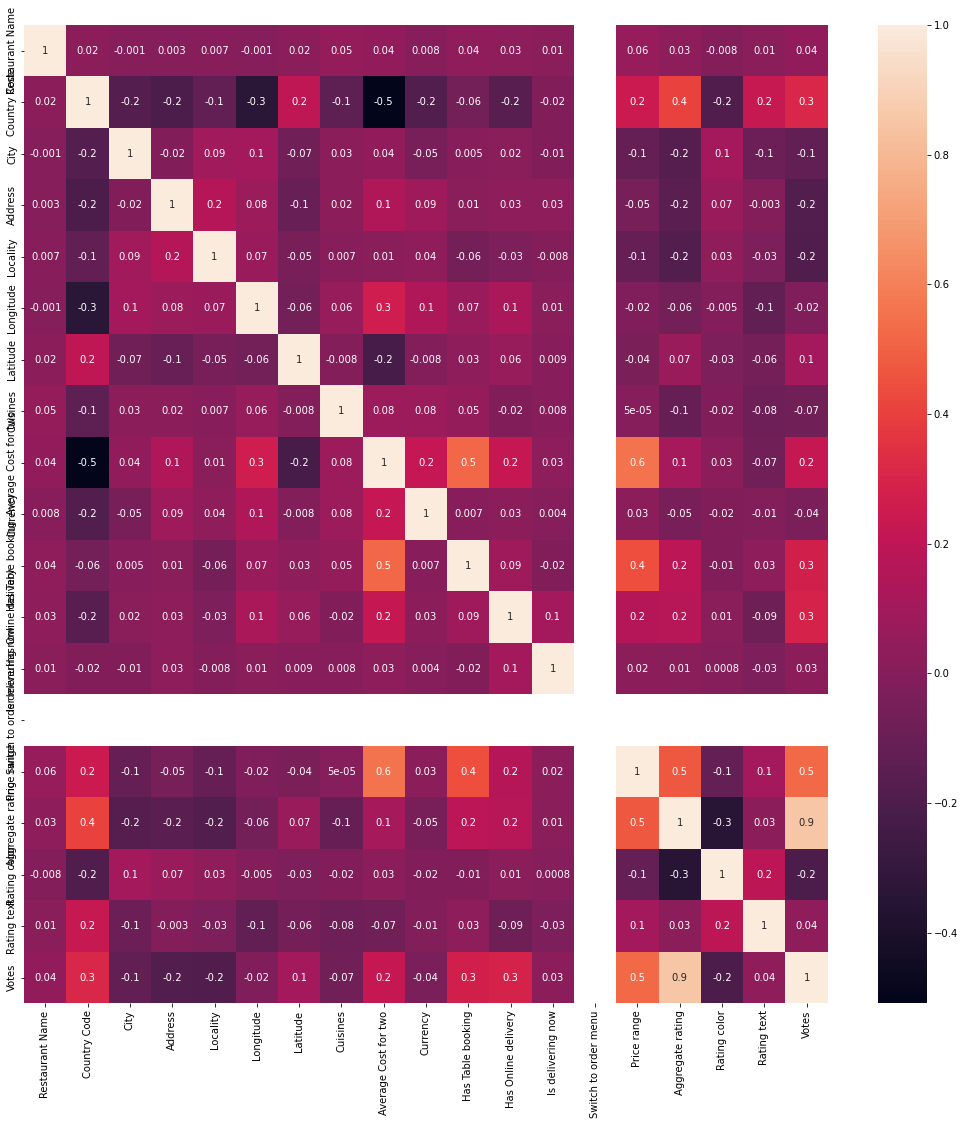

In [62]:
# For visualising the correlation in new dataset using heatmap method:-
plt.figure(figsize=(18,18))
sns.heatmap(data1.corr(),fmt='.1g',annot=True)
plt.yticks(rotation=90)

In this, some of the columns like Country code, Longitude, and our Target column also is highly correlated.

# Scaling Techniques:-

In [63]:
# For seperating x and y for training and testing purposes:-
x=data1.drop("Price range",axis=1)
y=data1["Price range"]

In [65]:
# For Scaling the data using standard scaler method:-
# For importing required Libraries:-
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [66]:
# For checking the Feature data:-
x.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes
0,0.049402,3.144209,-0.252712,1.612879,-1.560361,3.106575,-1.554844,-0.141514,1.145453,-4.928073,2.746265,-0.586149,-0.060373,0.0,2.619302,-2.022410,-0.451916,1.311217
1,-0.222084,3.144209,-0.252712,0.580354,-0.221591,3.105520,-1.555928,0.225213,1.261111,-4.928073,2.746265,-0.586149,-0.060373,0.0,2.011228,-2.022410,-0.451916,1.676346
2,-0.352131,3.144209,-0.163874,0.050966,-1.120716,3.108875,-1.553369,1.329422,3.122299,-4.928073,2.746265,-0.586149,-0.060373,0.0,1.823237,-1.343779,1.932324,1.225547
3,0.493177,3.144209,-0.163874,1.614868,0.631255,3.108847,-1.553008,0.255438,1.568415,-4.928073,-0.364131,-0.586149,-0.060373,0.0,2.837015,-2.022410,-0.451916,1.397200
4,0.875251,3.144209,-0.163874,1.614470,0.631255,3.108928,-1.553088,0.247378,1.568415,-4.928073,2.746265,-0.586149,-0.060373,0.0,2.619302,-2.022410,-0.451916,1.132756


#  Checking Multicollinearity :-

In [108]:
# For checking VIF:-
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif_Features,Features
0,1.008207,Restaurant Name
1,2.385936,Country Code
2,1.075675,City
3,1.113007,Address
4,1.070113,Locality
5,1.166971,Longitude
6,1.145633,Latitude
7,1.045203,Cuisines
8,2.625170,Average Cost for two
9,1.104524,Currency


Here, as seen above there is no problem of multicollinearity is seen in this dataset.

# Data Balancing:-

In [67]:
# For balancing the Target variable y using oversampling method:-
y.value_counts()

-1.015966    4437
 0.641605    3075
 1.270700    1297
 1.603627     553
Name: Price range, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [78]:
# For checking y value count after sampling:-
y.value_counts()

-1.015966    4437
 0.641605    3075
 1.270700    1297
 1.603627     553
Name: Price range, dtype: int64

# Finding the Best Random State:-

In [79]:
# For finding best random state and R2 score for models:-

# For importing required libraries:-
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [81]:
Max_acc=0
Max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    Model=RandomForestRegressor()
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>Max_acc:
        Max_acc=acc
        Max_rs=i
print("Best accuracy score: ",Max_acc,"on Random_state: ",Max_rs)

Best accuracy score:  0.9956120647056727 on Random_state:  17


In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=17)

# Model Building for Target Column:- Price range & Cross Validation Phase:-

In [97]:
# For importing required libraries:-
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [91]:
# for checking R2 score with 1st Algorithm:-
Gbc=GradientBoostingRegressor()
Gbc.fit(x_train,y_train)
pred=Gbc.predict(x_test)
R2_Score=r2_score(y_test,pred)
print('r2_score: ',R2_Score)
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred))

# cross validation score:-
score= cross_val_score(Gbc, x, y, cv=10).mean()
print("Cross Validation Score: ", score)

r2_score:  0.9894463466116813
mean_squared_error:  0.010565323753431454
mean_absolute_error:  0.037057033544610644
Cross Validation Score:  0.8983196774590096


In [92]:
# For checking R2 score and CV Score with 2nd algorithm:-
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
R2_Score=r2_score(y_test,pred)
print('r2_score: ',R2_Score)
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred))

# cross validation score
score= cross_val_score(rfr, x, y, cv=10).mean()
print("Cross Validation Score: ", score)

r2_score:  0.9958681781939791
mean_squared_error:  0.0041363908275040984
mean_absolute_error:  0.01493858244511147
Cross Validation Score:  0.9248143198610144


In [93]:
# For checking R2 score and Cv Score with 3rd alogirthm:-
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
R2_Score=r2_score(y_test,pred)
print('r2_score: ',R2_Score)
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred))

# cross validation score:-
score= cross_val_score(knn, x, y, cv=10).mean()
print("Cross Validation Score: ", score)

r2_score:  0.6763875590628485
mean_squared_error:  0.32397029571992836
mean_absolute_error:  0.38137106289790823
Cross Validation Score:  0.5221859754666783


In [94]:
# For checking R 2 score and Cv score with 4th algorithm:-
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
R2_Score=r2_score(y_test,pred)
print('r2_score: ',R2_Score)
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred))

# cross validation score:-
score= cross_val_score(DT, x, y, cv=10).mean()
print("Cross Validation Score: ", score)

r2_score:  0.9955002961998755
mean_squared_error:  0.004504679630229522
mean_absolute_error:  0.005983625651489822
Cross Validation Score:  0.9488815128642498


In [98]:
# For checking R2 score and CV Score with 5th algorithm:-
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred=etr.predict(x_test)
R2_Score=r2_score(y_test,pred)
print('r2_score: ',R2_Score)
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred))

# cross validation score:-
score= cross_val_score(etr, x, y, cv=10).mean()
print("Cross Validation Score: ", score)

r2_score:  0.9915643820666153
mean_squared_error:  0.008444946147758554
mean_absolute_error:  0.023854438382597314
Cross Validation Score:  0.9511006512851434


So, Here DecisionTree Regressor is giving highest R2 score of 99.5 % 
also with least difference between R2 score and Cross validation score, So this is the Final and best model to proceed for Hyper parameter tuning.

# Hyper Parameter Tuning:-

In [99]:
# For importing required libraries for Hyperparameter Tuning:-
from sklearn.model_selection import GridSearchCV

In [101]:
Parameters={'criterion':['squared_error','absolute_error'],'max_depth':[2,5],'min_samples_leaf':[2,10],
            'min_samples_split':[3,10],
            'max_leaf_nodes':[5,10]}

DT=DecisionTreeRegressor()
clf=GridSearchCV(DT,Parameters,cv=5)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'squared_error', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [105]:
DT=DecisionTreeRegressor(criterion='squared_error',max_depth=5, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=3)
DT.fit(x_train,y_train)
DT.score(x_train,y_train)
prediction=DT.predict(x_test)
dts=r2_score(y_test,prediction)
print("r2_score",dts*100)

dts_score=cross_val_score(DT,x,y,cv=5)
DTC=dts_score.mean()
print("Cross_Val_Score",DTC*100)

r2_score 98.44311993625816
Cross_Val_Score 93.4122512373538


So, Here is the score above after Hyper parameter Tuning.

# Saving the Model:-

In [106]:
# Here i am saving the best model:-
import pickle
Name='ZomatoPriceRange'
pickle.dump(DT,open(Name,'wb'))

# Loading the Saved Model for predictions:-

In [107]:
# For loading the saved model:-
Loaded=pickle.load(open('ZomatoPriceRange','rb'))
Predictions=Loaded.predict(x_test)
Predictions

array([0.67113712, 0.67113712, 0.67113712, ..., 1.28677516, 0.67113712,
       1.595474  ])

In [109]:
# For checking predicted and actual Values:-
pd.DataFrame([Loaded.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340
Predicted,0.671137,0.671137,0.671137,0.671137,0.671137,0.671137,0.671137,-1.009715,-1.009715,1.286775,...,0.671137,0.671137,0.671137,-1.009715,-1.009715,-1.009715,-1.009715,1.286775,0.671137,1.595474
Actual,0.641605,0.641605,0.641605,0.641605,0.641605,0.641605,0.641605,-1.015966,-1.015966,1.270700,...,0.641605,0.641605,0.641605,-1.015966,-1.015966,-1.015966,-1.015966,1.270700,0.641605,1.603627


# Now 2nd Target Column Model Building:-

In [111]:
# Lets assign values to x and y again:-
X1=data1.drop("Average Cost for two",axis=1)
Y1=data1["Average Cost for two"]

In [112]:
# For Scaling the data using standard scaler method:-
# For importing required Libraries:-
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(X1),columns=X1.columns)

In [113]:
# For checking the head of feature:-
X1.head()

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3699,3.144209,70,8508,160,3.106575,-1.554844,881,0,1,0,0,0,1.270700,2.619302,0,1,1.311217
1,3127,3.144209,70,5912,565,3.105520,-1.555928,1063,0,1,0,0,0,1.270700,2.011228,0,1,1.676346
2,2853,3.144209,72,4581,293,3.108875,-1.553369,1611,0,1,0,0,0,1.603627,1.823237,1,5,1.225547
3,4634,3.144209,72,8513,823,3.108847,-1.553008,1078,0,0,0,0,0,1.603627,2.837015,0,1,1.397200
4,5439,3.144209,72,8512,823,3.108928,-1.553088,1074,0,1,0,0,0,1.603627,2.619302,0,1,1.132756


# Best Random State:-

In [116]:
Max_acc=0
Max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    model=RandomForestRegressor()
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>Max_acc:
        Max_acc=acc
        Max_rs=i
print("Best R2 score: ",Max_acc,"on Random_state: ",Max_rs)

Best accuracy score:  1.0 on Random_state:  1


In [118]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=.25,random_state=1)

In [119]:
# for checking R2 score with 1st Algorithm:-
Gbc=GradientBoostingRegressor()
Gbc.fit(x_train,y_train)
pred=Gbc.predict(x_test)
R2_Score=r2_score(y_test,pred)
print('r2_score: ',R2_Score)
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred))

# cross validation score:-
score= cross_val_score(Gbc, x, y, cv=10).mean()
print("Cross Validation Score: ", score)

r2_score:  0.8992605838444505
mean_squared_error:  0.10552951767260307
mean_absolute_error:  0.23614521135076505
Cross Validation Score:  0.9999999992206294


In [120]:
# For checking R2 score and CV Score with 2nd algorithm:-
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
R2_Score=r2_score(y_test,pred)
print('r2_score: ',R2_Score)
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred))

# cross validation score
score= cross_val_score(rfr, x, y, cv=10).mean()
print("Cross Validation Score: ", score)

r2_score:  0.913626287574177
mean_squared_error:  0.09048073296171386
mean_absolute_error:  0.2131223877457313
Cross Validation Score:  1.0


In [121]:
# For checking R2 score and Cv Score with 3rd alogirthm:-
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
R2_Score=r2_score(y_test,pred)
print('r2_score: ',R2_Score)
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred))

# cross validation score:-
score= cross_val_score(knn, x, y, cv=10).mean()
print("Cross Validation Score: ", score)

r2_score:  0.010586838850718094
mean_squared_error:  1.036459190053162
mean_absolute_error:  0.764013778168675
Cross Validation Score:  0.9367193835383215


In [122]:
# For checking R 2 score and Cv score with 4th algorithm:-
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
R2_Score=r2_score(y_test,pred)
print('r2_score: ',R2_Score)
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred))

# cross validation score:-
score= cross_val_score(DT, x, y, cv=10).mean()
print("Cross Validation Score: ", score)

r2_score:  0.8486349842421717
mean_squared_error:  0.1585623355287795
mean_absolute_error:  0.2703582970026227
Cross Validation Score:  1.0


In [123]:
# For checking R2 score and CV Score with 5th algorithm:-
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred=etr.predict(x_test)
R2_Score=r2_score(y_test,pred)
print('r2_score: ',R2_Score)
print('mean_squared_error: ',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,pred))

# cross validation score:-
score= cross_val_score(etr, x, y, cv=10).mean()
print("Cross Validation Score: ", score)

r2_score:  0.9061245892274085
mean_squared_error:  0.09833913276658737
mean_absolute_error:  0.22286924072569714
Cross Validation Score:  0.9999998768209182


Here, RandomForestRegressor is giving best accuracy of 91.3 %
and with least difference between R2 score and CV score, so this is the best and Final Model to proceed for Hyper parameter tuning.

# Hyper Parameter Tuning:-

In [124]:
# For importing required libraries for Hyperparameter Tuning:-
from sklearn.model_selection import GridSearchCV

In [134]:
# For selecting parameter for RandomForest:-
parameters = {'criterion': ['squared_error','absolute_error'],
            'n_estimators':[100,200],
            'max_depth': [5,6,],
            'max_features':['sqrt']}

In [135]:
Grid=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
Grid.fit(x_train,y_train)

Grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [138]:
RF=RandomForestRegressor(criterion='squared_error',max_depth=6, max_features='sqrt',n_estimators=100)
RF.fit(x_train,y_train)
RF.score(x_train,y_train)
prediction=RF.predict(x_test)
rfr=r2_score(y_test,prediction)
print("r2_score",rfr*100)

rfr_score=cross_val_score(RF,x,y,cv=5)
Rforest=rfr_score.mean()
print("Cross_Val_Score",Rforest*100)

r2_score 83.91258846600142
Cross_Val_Score 96.18131997480133


# Saving Model:-

In [142]:
# For saving the best model:-
import pickle
Name='ZomatoAvcostfortwo'
pickle.dump(RF,open(Name,'wb'))

# Loading the Saved Model for Predictions:-

In [143]:
Load=pickle.load(open('ZomatoAvcostfortwo','rb'))
predictions=Load.predict(x_test)
predictions

array([ 0.44550036, -0.15273327,  0.45816541, ..., -0.35893769,
        0.52138427,  0.21961402])

In [144]:
# For checking predicted and actual Values in 2nd Target column also:-
pd.DataFrame([Loaded.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price range
Feature names seen at fit time, yet now missing:
- Average Cost for two

  warnings.warn(message, FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340
Predicted,1.595474,1.595474,1.595474,1.595474,1.595474,1.595474,1.595474,1.595474,1.595474,1.595474,...,1.595474,1.595474,1.595474,1.595474,1.595474,1.595474,1.595474,1.595474,1.595474,1.595474
Actual,0.492645,-0.045403,0.741089,-0.513982,-1.658840,-0.719466,1.568415,0.194749,-0.719466,0.399914,...,0.399914,0.194749,-1.293215,-1.293215,0.741089,-0.719466,1.261111,-0.045403,0.194749,0.194749


In [145]:
# For merging two datasets together:-
merge=pd.merge(data1,datanew)

C:\Users\RISHABH JOHRI\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1205: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


In [146]:
# For displaying the merged dataset:-
merge

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
